# Unsupervised learning: basics


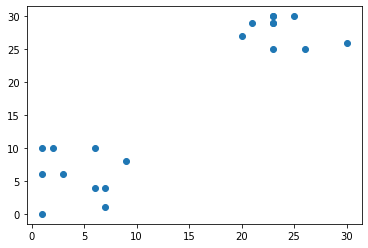

In [30]:
x= [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]
y= [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]
import matplotlib.pyplot as plt


# Create a scatter plot
plt.scatter(x, y)

# Display the scatter plot
plt.show()

# Basics of cluster analysis


In [31]:
import pandas as pd 
import seaborn as sns
df= pd.DataFrame({'x':x, 'y':y})

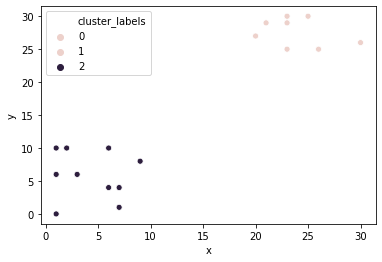

In [32]:
# Import linkage and fcluster functions
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage() function to compute distance
Z = linkage(df, 'ward')

# Generate cluster labels
df['cluster_labels'] = fcluster(Z, 2, criterion='maxclust')

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()

In [ ]:
# Import kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Compute cluster centers
centroids,_ = kmeans(df, 2)

# Assign cluster labels
df['cluster_labels'], _ = vq(df, centroids)

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()

# Data preparation for cluster analysis


In [28]:
# Import the whiten function
from scipy.cluster.vq import whiten

goals_for = [4,3,2,3,1,1,2,0,1,4]

# Use the whiten() function to standardize the data
scaled_data = whiten(goals_for)
print(scaled_data)

[3.07692308 2.30769231 1.53846154 2.30769231 0.76923077 0.76923077
 1.53846154 0.         0.76923077 3.07692308]


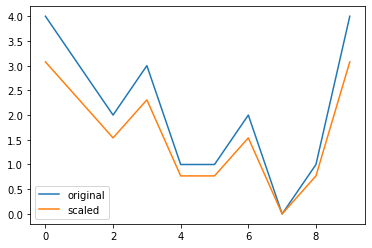

In [29]:
# Plot original data
plt.plot(goals_for, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

# Show the legend in the plot
plt.legend()

# Display the plot
plt.show()

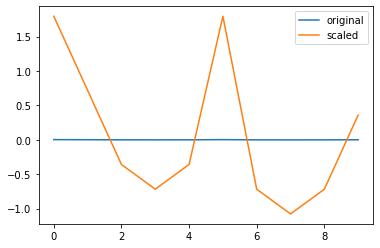

In [30]:
# Prepare data
rate_cuts = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]

# Use the whiten() function to standardize the data
scaled_data = whiten(rate_cuts)

# Plot original data
plt.plot(rate_cuts, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

plt.legend()
plt.show()

In [33]:
fifa= pd.read_csv('fifa_18_sample_data.csv')
print(fifa['eur_wage'])
print(fifa.eur_value)

0      565000.0
1      565000.0
2      280000.0
3      510000.0
4      230000.0
         ...   
995     31000.0
996      8000.0
997      9000.0
998     32000.0
999     52000.0
Name: eur_wage, Length: 1000, dtype: float64
0       95500000.0
1      105000000.0
2      123000000.0
3       97000000.0
4       61000000.0
          ...     
995      9000000.0
996      8000000.0
997      4300000.0
998      7000000.0
999     12000000.0
Name: eur_value, Length: 1000, dtype: float64


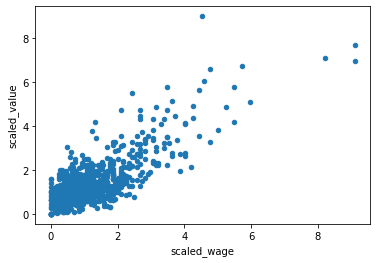

       scaled_wage  scaled_value
count  1000.000000   1000.000000
mean      1.119812      1.306272
std       1.000500      1.000500
min       0.000000      0.000000
25%       0.467717      0.730412
50%       0.854794      1.022576
75%       1.407184      1.542995
max       9.112425      8.984064


In [34]:
# Scale wage and value
fifa['scaled_wage'] = whiten(fifa['eur_wage'])
fifa['scaled_value'] = whiten(fifa['eur_value'])

# Plot the two columns in a scatter plot
fifa.plot(x='scaled_wage', y='scaled_value', kind = 'scatter')
plt.show()

# Check mean and standard deviation of scaled values
print(fifa[['scaled_wage', 'scaled_value']].describe())

# Basics of hierarchical clustering


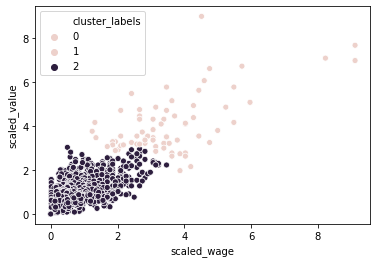

In [47]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(fifa[['scaled_wage', 'scaled_value']], method = 'ward', metric = 'euclidean')

# Assign cluster labels
fifa['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='scaled_wage', y='scaled_value', 
                hue='cluster_labels', data = fifa)
plt.show()

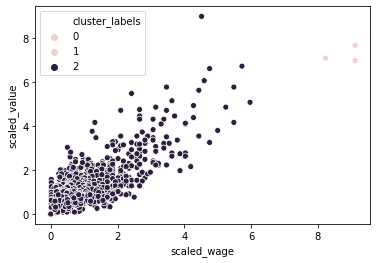

In [46]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(fifa[['scaled_wage', 'scaled_value']], method = 'single', metric = 'euclidean')

# Assign cluster labels
fifa['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='scaled_wage', y='scaled_value', 
                hue='cluster_labels', data = fifa)
plt.show()

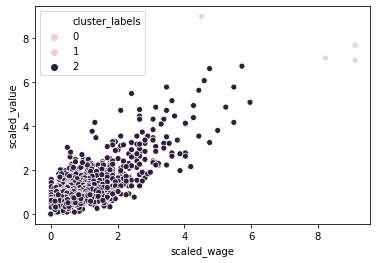

In [49]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(fifa[['scaled_wage', 'scaled_value']], method='complete', metric='euclidean')

# Assign cluster labels
fifa['cluster_labels'] = fcluster(distance_matrix, 2,  criterion='maxclust')

# Plot clusters
sns.scatterplot(x='scaled_wage', y='scaled_value', 
                hue='cluster_labels', data = fifa)
plt.show()

# Visualize clusters

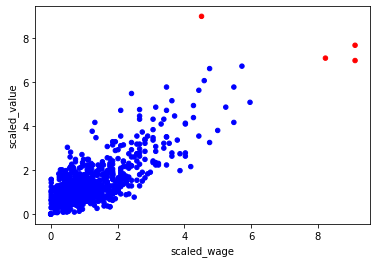

In [51]:
# Import the pyplot class
import matplotlib.pyplot as plt
# Define a colors dictionary for clusters
colors = {1:'red', 2:'blue'}

# Plot a scatter plot
fifa.plot.scatter(x='scaled_wage', 
                	   y='scaled_value',
                	   c=fifa['cluster_labels'].apply(lambda x: colors[x]))
plt.show()

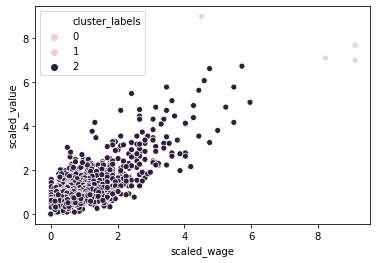

In [53]:
import seaborn as sns
sns.scatterplot(x='scaled_wage', y='scaled_value', data=fifa, hue='cluster_labels')

# How many clusters?


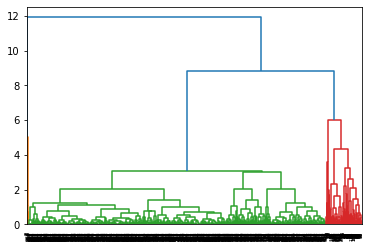

In [54]:
# Import the dendrogram function
from scipy.cluster.hierarchy import dendrogram

# Create a dendrogram
dn = dendrogram(distance_matrix)

# Display the dendogram
plt.show()

# Limitations of hierarchical clustering


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster, linkage
from scipy.cluster.vq import whiten
import seaborn as sns

In [4]:
fifa1= pd.read_csv('fifa_18_dataset.csv')
fifa1= fifa1.loc[0:5000]
fifa1['scaled_sliding_tackle']= whiten(fifa1.sliding_tackle)
fifa1['scaled_aggression']= whiten(fifa1.aggression)

                scaled_sliding_tackle  scaled_aggression
cluster_labels                                          
1                            3.014082           4.419408
2                            0.776010           1.973254
3                            1.458932           3.620465


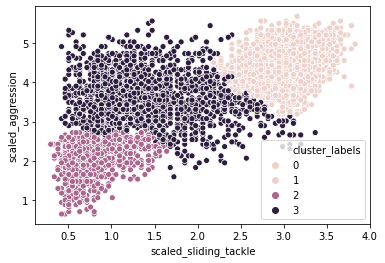

In [8]:
# Fit the data into a hierarchical clustering algorithm
distance_matrix = linkage(fifa1[['scaled_sliding_tackle', 'scaled_aggression']], 'ward')

# Assign cluster labels to each row of data
fifa1['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

# Display cluster centers of each cluster
print(fifa1[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_sliding_tackle', y='scaled_aggression', data=fifa1, hue='cluster_labels')
plt.show()

# Basics of k-means clustering


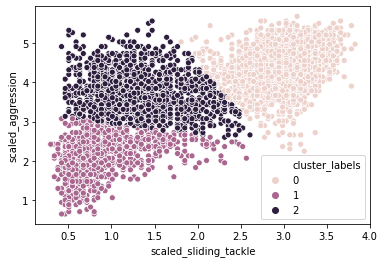

In [16]:
# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortion = kmeans(fifa1[['scaled_sliding_tackle', 'scaled_aggression']], 3)

# Assign cluster labels
fifa1['cluster_labels'], distortion_list= vq(fifa1[['scaled_sliding_tackle', 'scaled_aggression']], cluster_centers)

# Plot clusters
sns.scatterplot(x='scaled_sliding_tackle', y='scaled_aggression', 
                hue='cluster_labels', data = fifa1)
plt.show()

# How many clusters?


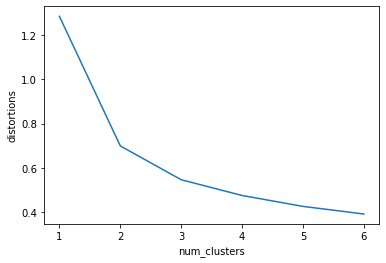

In [29]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(fifa1[['scaled_sliding_tackle', 'scaled_aggression']], i)
    distortions.append(distortion)

# Create a data frame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

([<matplotlib.axis.XTick at 0x7fda65b76e20>,
 <a list of 4 Text major ticklabel objects>)

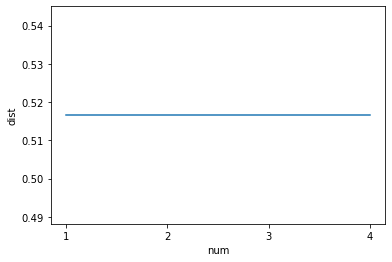

In [36]:
dis=[]
num= range(1,5)
for i in num:
    center, dist= kmeans(fifa[['scaled_wage', 'scaled_value']], i)
    dis.append(dist)
elbow=pd.DataFrame({'num':num, 'dist':dist})
sns.lineplot(x='num', y='dist', data=elbow)
plt.xticks(num)

# Limitations of k-means cluster

In [37]:
from numpy import random

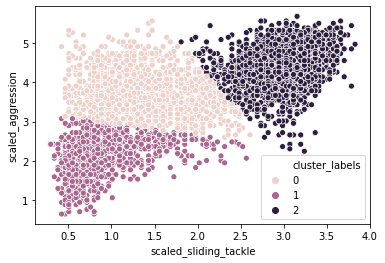

In [44]:
# Import random class
from numpy import random

# Initialize seed
random.seed([1,2,1000])

# Run kmeans clustering
cluster_centers, distortion = kmeans(fifa1[['scaled_sliding_tackle', 'scaled_aggression']], 3)
fifa1['cluster_labels'], distortion_list = vq(fifa1[['scaled_sliding_tackle', 'scaled_aggression']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='scaled_sliding_tackle', y='scaled_aggression', 
                hue='cluster_labels', data = fifa1)
plt.show()


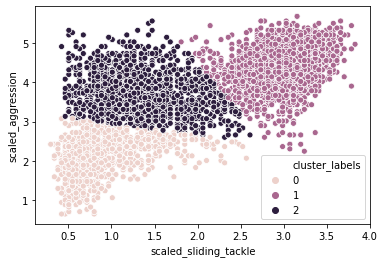

In [47]:
# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq 

# Generate cluster centers
cluster_centers, distortion = kmeans(fifa1[['scaled_sliding_tackle', 'scaled_aggression']], 3)

# Assign cluster labels
fifa1['cluster_labels'], distortion_list = vq(fifa1[['scaled_sliding_tackle', 'scaled_aggression']], cluster_centers)


# Plot clusters
sns.scatterplot(x='scaled_sliding_tackle', y='scaled_aggression', 
                hue='cluster_labels', data = fifa1)
plt.show()

                scaled_sliding_tackle  scaled_aggression
cluster_labels                                          
0                            0.866919           2.092779
1                            1.352898           3.739746
2                            2.986475           4.376399


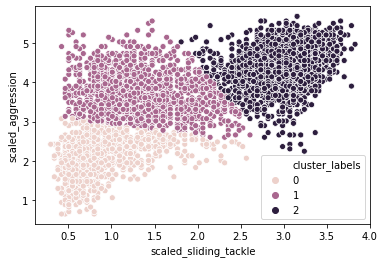

In [50]:
# Set up a random seed in numpy
random.seed([1000,2000])

# Fit the data into a k-means algorithm
cluster_centers,_ = kmeans(fifa1[['scaled_sliding_tackle', 'scaled_aggression']], 3)

# Assign cluster labels
fifa1['cluster_labels'], _ = vq(fifa1[['scaled_sliding_tackle', 'scaled_aggression']], cluster_centers)

# Display cluster centers 
print(fifa1[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_sliding_tackle', y='scaled_aggression', hue='cluster_labels', data=fifa1)
plt.show()

# Dominant colors in images


In [53]:
movie= pd.read_csv('movie.csv')
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   1000 non-null   object
 1   Plot    1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [57]:
r=[]
g=[]
b=[]

# Read batman image and print dimensions
batman_image = plt.imread('batman.jpg')
print(batman_image.shape)

# Store RGB values of all pixels in lists r, g and b
for row in batman_image:
    for temp_r, temp_g, temp_b in row:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

(169, 269, 3)


In [67]:
batman_df= pd.DataFrame({'red':r, 'blue':b, 'green':g})
batman_df[['scaled_red', 'scaled_blue', 'scaled_green']]= whiten(batman_df[['red', 'blue', 'green']])

In [69]:
batman_df

,red,blue,green,scaled_red,scaled_blue,scaled_green
0,36,25,28,0.450157,0.279912,0.370103
1,39,19,21,0.487671,0.212733,0.277577
2,52,21,20,0.650227,0.235126,0.264359
3,61,28,27,0.762767,0.313502,0.356885
4,37,18,15,0.462662,0.201537,0.198269
...,...,...,...,...,...,...
45456,33,27,24,0.412644,0.302305,0.317231
45457,31,25,22,0.387636,0.279912,0.290795
45458,34,28,25,0.425149,0.313502,0.330449
45459,18,15,14,0.225079,0.167947,0.185051


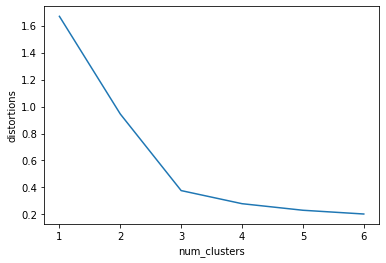

In [70]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(batman_df[['scaled_red', 'scaled_blue', 'scaled_green']], i)
    distortions.append(distortion)

# Create a data frame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters':num_clusters, 'distortions': distortions})

# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

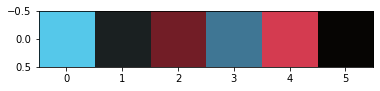

In [74]:
# Get standard deviations of each color
r_std, g_std, b_std = batman_df[['red', 'green', 'blue']].std()

colors=[]
for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    # Convert each standardized value to scaled value
    colors.append((
        scaled_r * r_std / 255,
        scaled_g * g_std / 255,
        scaled_b * b_std / 255
    ))

# Display colors of cluster centers
plt.imshow([colors])
plt.show()


# Document clustering


In [75]:
# Import TfidfVectorizer class from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
TfidfVectorizer()

In [ ]:
from nltk.tokenize import word_tokenize
import re
def remove_noise(text, stop_words = []):    
    tokens = word_tokenize(text)    
    cleaned_tokens = []    
    for token in tokens:        
        token = re.sub('[^A-Za-z0-9]+', '', token)       
        if len(token) > 1 and token.lower() not in stop_words:          
            # Get lowercase           
            cleaned_tokens.append(token.lower())    
    return cleaned_tokens
remove_noise("It is lovely weather we are having. I hope the weather continues.")

In [ ]:
# Import TfidfVectorizer class from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.75, max_features=50,
                                   min_df=0.1, tokenizer=remove_noise)

# Use the .fit_transform() method on the list plots
tfidf_matrix = tfidf_vectorizer.fit_transform(plots)

In [ ]:
num_clusters = 2

# Generate cluster centers through the kmeans function
cluster_centers, distortion = kmeans(tfidf_matrix.todense(), num_clusters)

# Generate terms from the tfidf_vectorizer object
terms = tfidf_vectorizer.get_feature_names()

for i in range(num_clusters):
    # Sort the terms and print top 3 terms
    center_terms = dict(zip(terms, list(cluster_centers[i])))
    sorted_terms = sorted(center_terms, key=center_terms.get, reverse=True)
    print(sorted_terms[:3])

# Clustering with multiple features


In [101]:
fifa= pd.read_csv('fifa_18_sample_data.csv')
fifa= fifa.loc[0:249]
fifa.ID

0       20801
1      158023
2      190871
3      176580
4      167495
        ...  
245    190483
246    190456
247    189560
248    188942
249    188803
Name: ID, Length: 250, dtype: int64

In [102]:
fifa.sho
fifa.pac
fifa.dri

fifa[['scaled_pac', 'scaled_dri', 'scaled_sho']]= whiten(fifa[['pac', 'dri', 'sho']])
fifa.head()
center, dis= kmeans(fifa[['scaled_pac', 'scaled_dri', 'scaled_sho']], 3)
fifa['cluster_labels'], _= vq(fifa[['scaled_pac', 'scaled_dri', 'scaled_sho']], center)
fifa.cluster_labels.value_counts()

0    106
1     83
2     61
Name: cluster_labels, dtype: int64

In [103]:
# Print the size of the clusters
print(fifa.groupby('cluster_labels')['ID'].count())

# Print the mean value of wages in each cluster
print(fifa.groupby('cluster_labels')['eur_wage'].mean())

cluster_labels
0    106
1     83
2     61
Name: ID, dtype: int64
cluster_labels
0    131358.490566
1    132120.481928
2    115950.819672
Name: eur_wage, dtype: float64


In [108]:
fifa[['scaled_pas','scaled_def','scaled_phy']] = whiten(fifa[['pas', 'def', 'phy']])
scaled_features= ['scaled_pac',
 'scaled_sho',
 'scaled_pas',
 'scaled_dri',
 'scaled_def',
 'scaled_phy']

                scaled_pac  scaled_sho  scaled_pas  scaled_dri  scaled_def  \
cluster_labels                                                               
0                 6.617743    3.885153    7.353643    7.148098    3.862353   
1                 7.762181    5.610629    8.620873    8.968266    2.262328   

                scaled_phy  
cluster_labels              
0                 9.009407  
1                 8.009867  


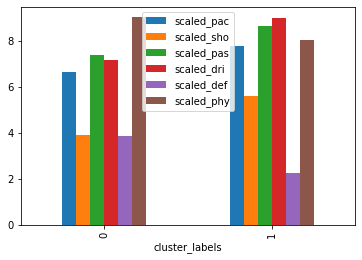

1 ['Cristiano Ronaldo' 'L. Messi' 'Neymar' 'L. Suárez' 'M. Neuer']
0 ['Sergio Ramos' 'G. Chiellini' 'L. Bonucci' 'J. Boateng' 'D. Godín']


In [123]:
# Create centroids with kmeans for 2 clusters
cluster_centers,_ = kmeans(fifa[scaled_features], 2)

# Assign cluster labels and print cluster centers
fifa['cluster_labels'], _ = vq(fifa[scaled_features], cluster_centers)
print(fifa.groupby('cluster_labels')[scaled_features].mean())

# Plot cluster centers to visualize clusters
fifa.groupby('cluster_labels')[scaled_features].mean().plot(legend=True, kind='bar')
plt.legend(loc= 'upper center')
plt.show()

# Get the name column of first 5 players in each cluster
for cluster in fifa['cluster_labels'].unique():
    print(cluster, fifa[fifa['cluster_labels'] == cluster]['name'].values[:5])
